<a href="https://www.kaggle.com/code/deepkayastha6890/initial-bank-loan-risk-score-finder?scriptVersionId=297810447" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/datasets/larsen0966/sba-loans-case-data-set/SBAcase.11.13.17.csv


In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "SBAcase.11.13.17.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "larsen0966/sba-loans-case-data-set",
  file_path,
)
display("First 5 records:", df.head())

/tmp/ipykernel_17/4058040613.py:6: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


'First 5 records:'

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,0,1004285007,SIMPLEX OFFICE SOLUTIONS,ANAHEIM,CA,92801,CALIFORNIA BANK & TRUST,CA,532420,15074,...,0,30000,15000,0,0,0.5,0,1080,16175.0,0
1,1,1004535010,DREAM HOME REALTY,TORRANCE,CA,90505,CALIFORNIA BANK & TRUST,CA,531210,15130,...,0,30000,15000,0,0,0.5,1,1680,17658.0,0
2,0,1005005006,"Winset, Inc. dba Bankers Hill",SAN DIEGO,CA,92103,CALIFORNIA BANK & TRUST,CA,531210,15188,...,0,30000,15000,0,0,0.5,0,1080,16298.0,0
3,1,1005535001,Shiva Management,SAN DIEGO,CA,92108,CALIFORNIA BANK & TRUST,CA,531312,15719,...,0,50000,25000,0,0,0.5,0,1080,16816.0,0
4,1,1005996006,"GOLD CROWN HOME LOANS, INC",LOS ANGELES,CA,91345,SBA - EDF ENFORCEMENT ACTION,CO,531390,16840,...,0,343000,343000,0,1,1.0,0,7200,24103.0,0


In [3]:
def dataDiscribtion(df):
    print("\n\nTotal Columns with name : ",df.columns)
    print("\n\nInformation of the data : ",df.info())
    print("\n\nDataset shape : ",df.shape)
    display("\n\nDataset Null Values finding : ",df.isnull().sum())
dataDiscribtion(df)



Total Columns with name :  Index(['Selected', 'LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank',
       'BankState', 'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate',
       'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr',
       'GrAppv', 'SBA_Appv', 'New', 'RealEstate', 'Portion', 'Recession',
       'daysterm', 'xx', 'Default'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Selected           2102 non-null   int64  
 1   LoanNr_ChkDgt      2102 non-null   int64  
 2   Name               2102 non-null   object 
 3   City               2102 non-null   object 
 4   State              2102 non-null   object 
 5   Zip                210

'\n\nDataset Null Values finding : '

Selected                0
LoanNr_ChkDgt           0
Name                    0
City                    0
State                   0
Zip                     0
Bank                    3
BankState               3
NAICS                   0
ApprovalDate            0
ApprovalFY              0
Term                    0
NoEmp                   0
NewExist                1
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr               2
LowDoc                  3
ChgOffDate           1405
DisbursementDate        3
DisbursementGross       0
BalanceGross            0
MIS_Status              0
ChgOffPrinGr            0
GrAppv                  0
SBA_Appv                0
New                     0
RealEstate              0
Portion                 0
Recession               0
daysterm                0
xx                      3
Default                 0
dtype: int64

In [4]:
def dataCleaning(cleanData):
    data = cleanData.copy()
    data = data.dropna(subset=['Bank','NewExist','LowDoc','DisbursementDate','RevLineCr'])
    data['ChgOffDate']= data['ChgOffDate'].fillna(0)
    data = data.drop('BalanceGross',axis=1)
    display(data.isnull().sum())
    return data
cleanDF = dataCleaning(df)
dataDiscribtion(cleanDF)

Selected             0
LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
ChgOffDate           0
DisbursementDate     0
DisbursementGross    0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
New                  0
RealEstate           0
Portion              0
Recession            0
daysterm             0
xx                   0
Default              0
dtype: int64



Total Columns with name :  Index(['Selected', 'LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank',
       'BankState', 'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate',
       'DisbursementGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv',
       'New', 'RealEstate', 'Portion', 'Recession', 'daysterm', 'xx',
       'Default'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 2090 entries, 0 to 2100
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Selected           2090 non-null   int64  
 1   LoanNr_ChkDgt      2090 non-null   int64  
 2   Name               2090 non-null   object 
 3   City               2090 non-null   object 
 4   State              2090 non-null   object 
 5   Zip                2090 non-null   int64  


'\n\nDataset Null Values finding : '

Selected             0
LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
ChgOffDate           0
DisbursementDate     0
DisbursementGross    0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
New                  0
RealEstate           0
Portion              0
Recession            0
daysterm             0
xx                   0
Default              0
dtype: int64

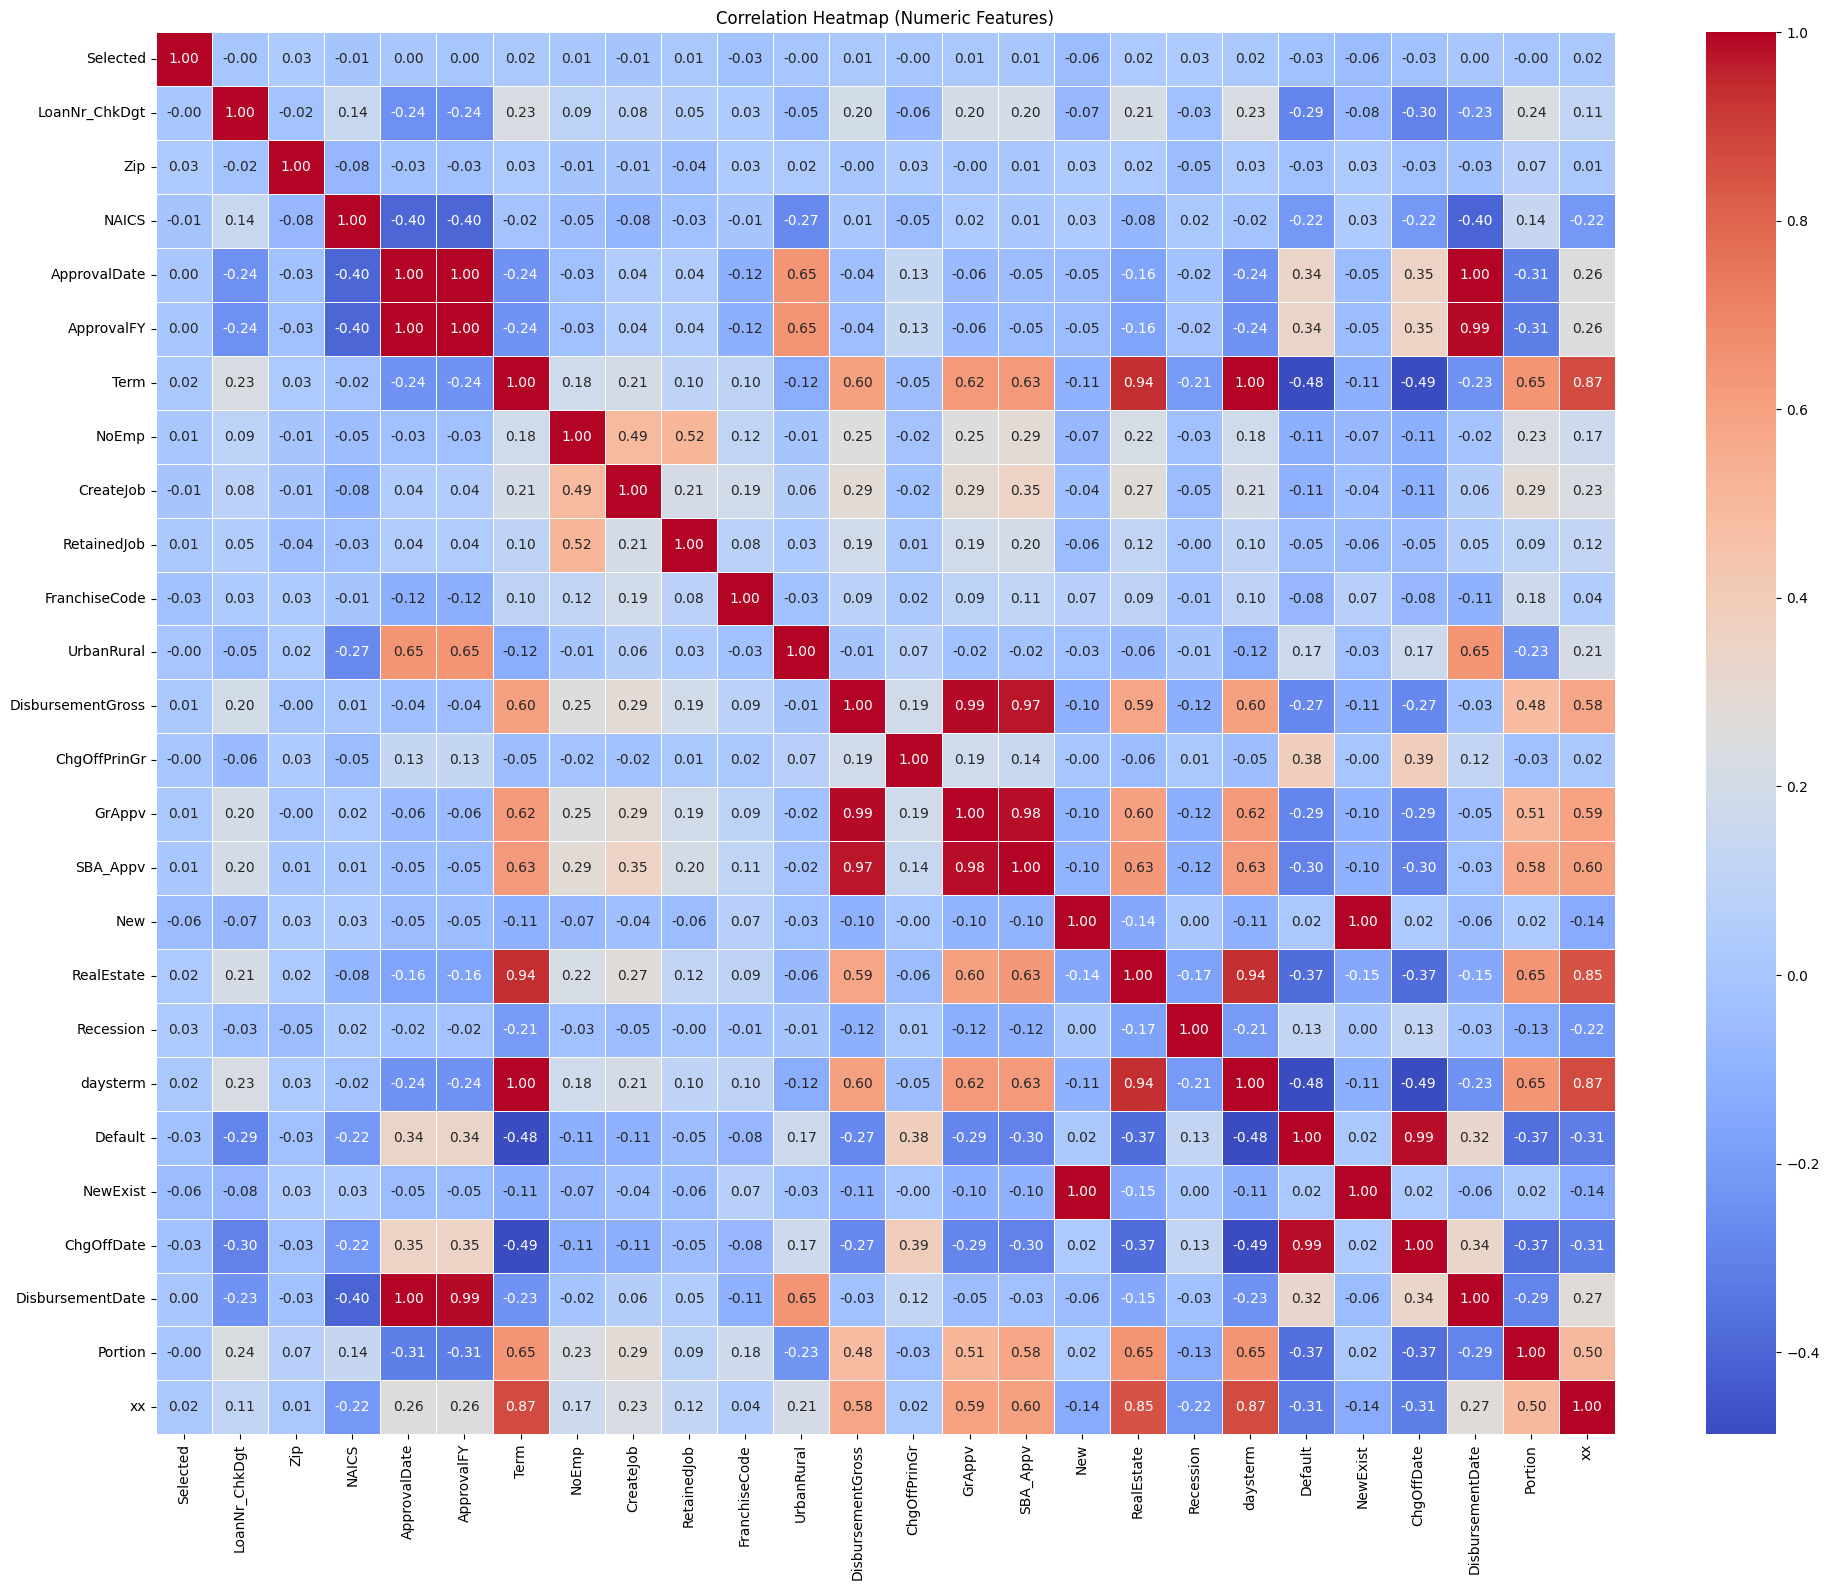

In [5]:
    int_cols = cleanDF.select_dtypes(include=['int64', 'int32']).columns.tolist()
    float_cols = cleanDF.select_dtypes(include=['float64', 'float32']).columns.tolist()
    numeric_cols = int_cols + float_cols

    numeric_df = cleanDF[numeric_cols]
    numeric_df = numeric_df.dropna()
    corr_matrix = numeric_df.corr(method="pearson")

    plt.figure(figsize=(20, 16))
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        linewidths=0.5
    )
    plt.title("Correlation Heatmap (Numeric Features)")
    plt.tight_layout()
    plt.show()


In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

def dataNormalization(df):
    data = df.copy()

    data=data.drop(['Name','State','Zip','Bank','BankState','ApprovalDate','MIS_Status','daysterm'],axis=1)
    data['RevLineCr'] = data['RevLineCr'].map({'Y': 1, 'N': 0})
    data['LowDoc'] = data['LowDoc'].map({'Y': 1, 'N': 0})
    data['NewExist'] = data['NewExist'].replace({1: 0, 2: 1})
    data['UrbanRural'] = data['UrbanRural'].replace({0: 0.5, 1: 1, 2: 0})
    log_cols = [
        "NoEmp", "CreateJob", "RetainedJob",
        "DisbursementGross", "ChgOffPrinGr",
        "GrAppv", "SBA_Appv",
        "Term"
    ]
    for col in log_cols:
        data[col] = np.log1p(data[col])

    scale_cols = log_cols + ["ApprovalFY"]

    scaler = StandardScaler()
    data[scale_cols] = scaler.fit_transform(data[scale_cols])

    return data


# APPLY
cleanDF = dataNormalization(cleanDF)
cleanDF.columns

Index(['Selected', 'LoanNr_ChkDgt', 'City', 'NAICS', 'ApprovalFY', 'Term',
       'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode',
       'UrbanRural', 'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate',
       'DisbursementGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'New',
       'RealEstate', 'Portion', 'Recession', 'xx', 'Default'],
      dtype='object')

Dataset Shape : (2090, 26)
Total Loans   : 2090
Unique Cities : 516
Unique Sectors (NAICS) : 24

Top Cities Risk Snapshot


,Total_Loans,Total_Disbursement,Avg_Loan,Avg_Term,Default_Rate,ChargeOff_Rate,Avg_ChargeOff,Avg_Employees,Jobs_Created,Jobs_Retained,New_Business_Ratio,Franchise_Ratio,RealEstate_Ratio,RevLine_Ratio,LowDoc_Ratio,Avg_Approved,Avg_SBA_Guarantee,Avg_SBA_Portion,NAICS_Diversity,Recession_Exposure
City,,,,,,,,,,,,,,,,,,,,
LOS ANGELES,161,-18.486876,-0.114825,-0.095814,0.310559,0.316770,-0.042313,-0.132678,-0.040698,0.096737,0.124224,0.770186,0.273292,0.0,0.0,-0.089053,-0.089875,0.654816,20,0.055901
SAN DIEGO,110,2.416976,0.021973,-0.025781,0.336364,0.336364,0.017165,0.188163,0.014060,0.247403,0.090909,0.781818,0.281818,0.0,0.0,0.014819,0.008971,0.668753,21,0.045455
SAN JOSE,65,2.522279,0.038804,0.359280,0.261538,0.276923,-0.107434,-0.146892,0.137550,-0.175521,0.215385,0.630769,0.400000,0.0,0.0,0.079743,0.115422,0.722769,8,0.015385
SAN FRANCISCO,39,-2.257192,-0.057877,-0.046480,0.256410,0.256410,-0.150796,-0.163782,-0.110664,-0.102135,0.179487,0.641026,0.256410,0.0,0.0,-0.093855,-0.085839,0.670513,13,0.076923
SACRAMENTO,33,5.550385,0.168193,0.270680,0.242424,0.272727,-0.118487,0.049619,0.343855,-0.269111,0.181818,0.636364,0.393939,0.0,0.0,0.192190,0.224953,0.737879,8,0.090909
ANAHEIM,28,-1.007901,-0.035996,-0.004435,0.178571,0.178571,-0.347222,0.269800,0.010197,0.144814,0.142857,0.857143,0.321429,0.0,0.0,0.010809,0.018293,0.680583,14,0.214286
CHULA VISTA,25,2.429480,0.097179,0.212618,0.560000,0.560000,0.510832,-0.040200,0.251365,0.109018,0.080000,0.920000,0.480000,0.0,0.0,0.143841,0.137669,0.683584,7,0.040000
IRVINE,23,13.108670,0.569942,0.337337,0.217391,0.260870,-0.139880,0.370802,0.362744,0.245108,0.130435,0.956522,0.521739,0.0,0.0,0.590751,0.578979,0.743478,8,0.130435
LONG BEACH,21,-7.471409,-0.355781,-0.360514,0.476190,0.476190,0.287213,-0.154320,0.087371,0.118598,0.285714,0.666667,0.238095,0.0,0.0,-0.332830,-0.339901,0.623810,6,0.047619


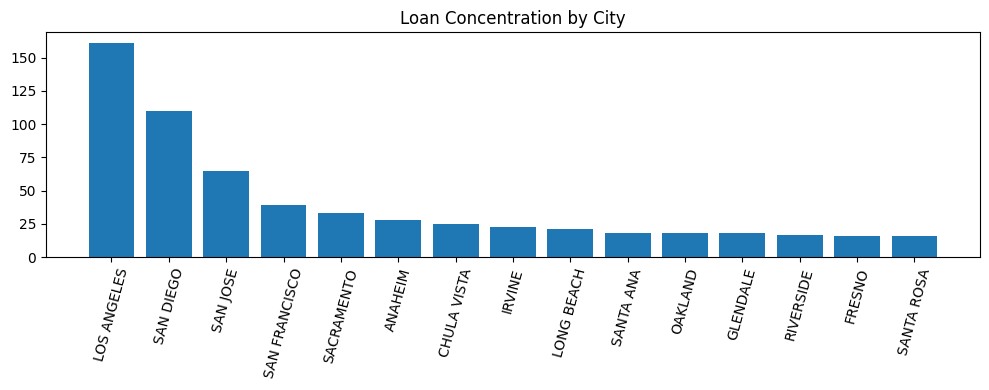

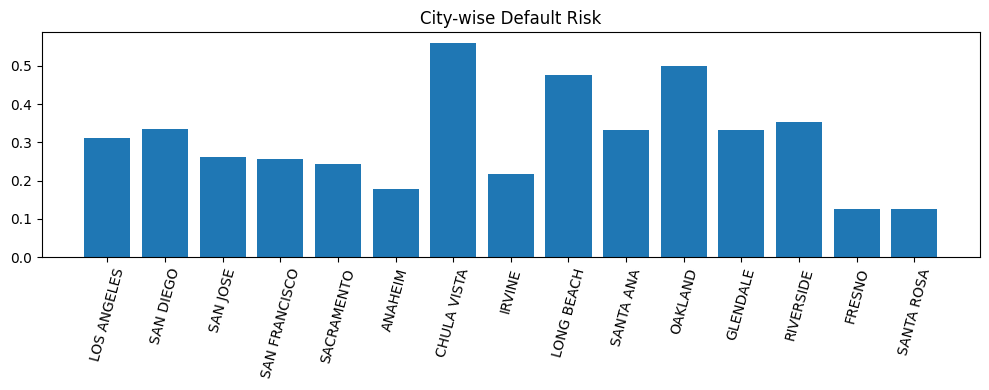

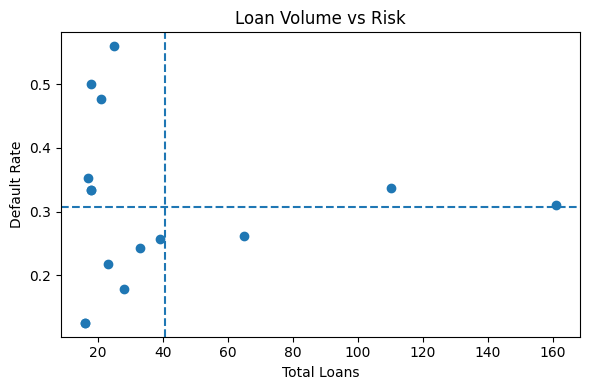

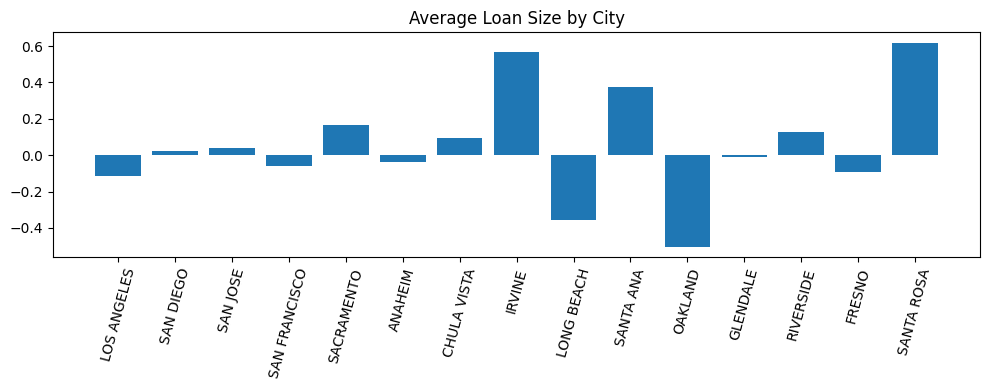

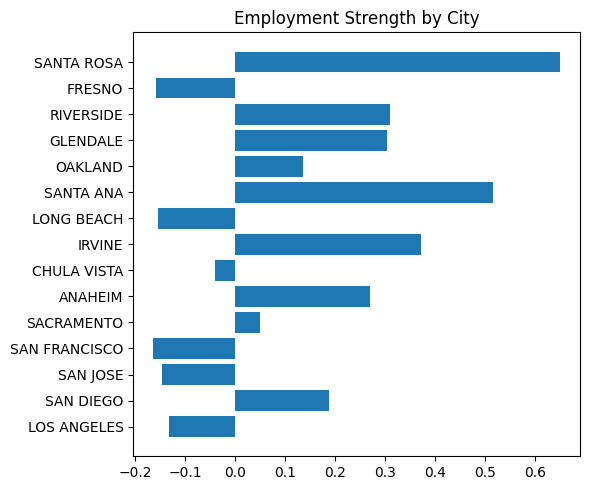

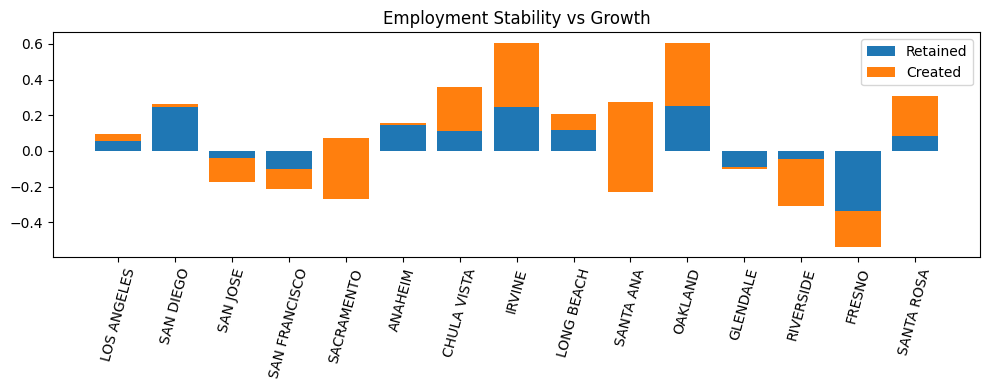

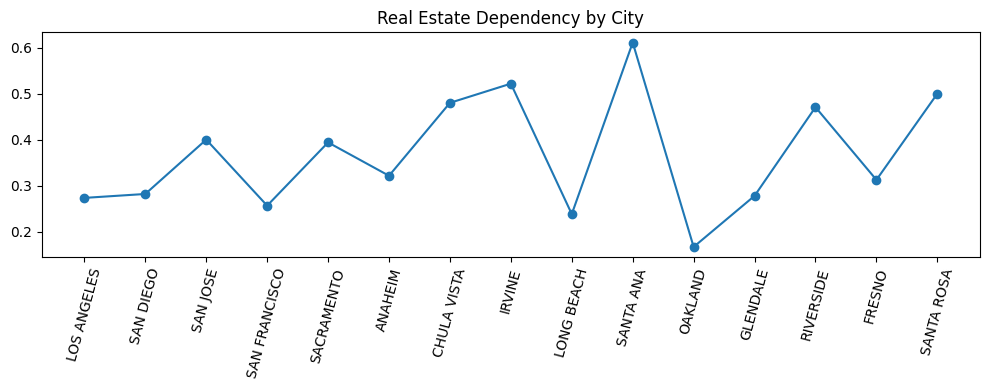

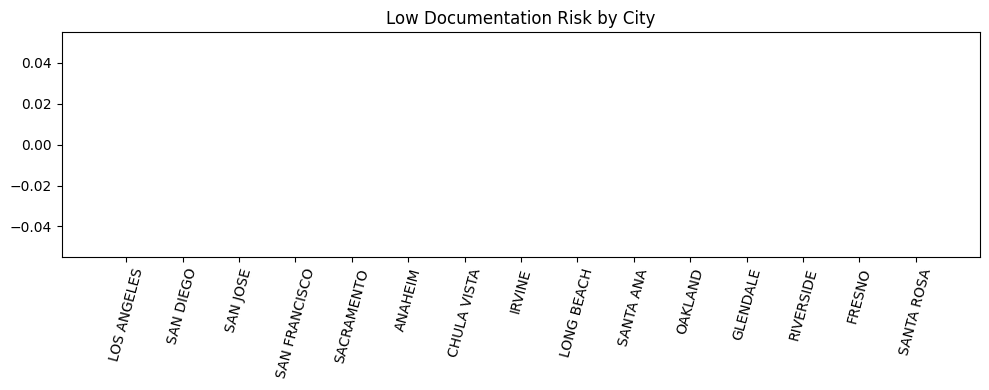

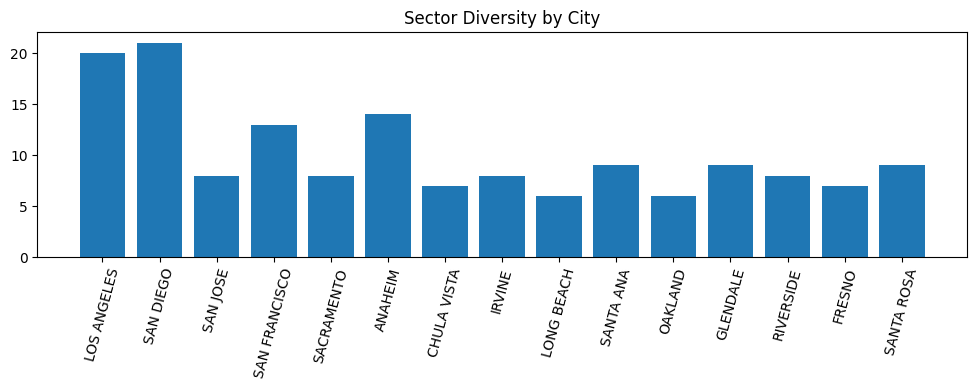

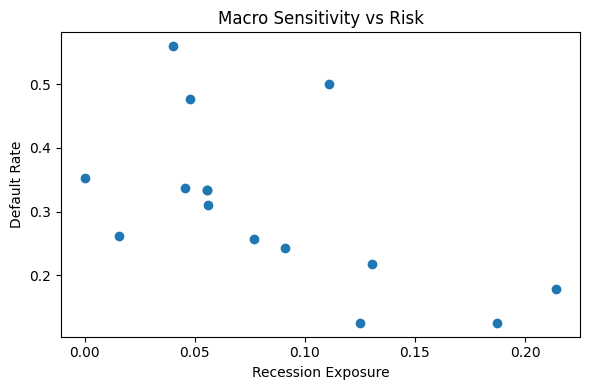

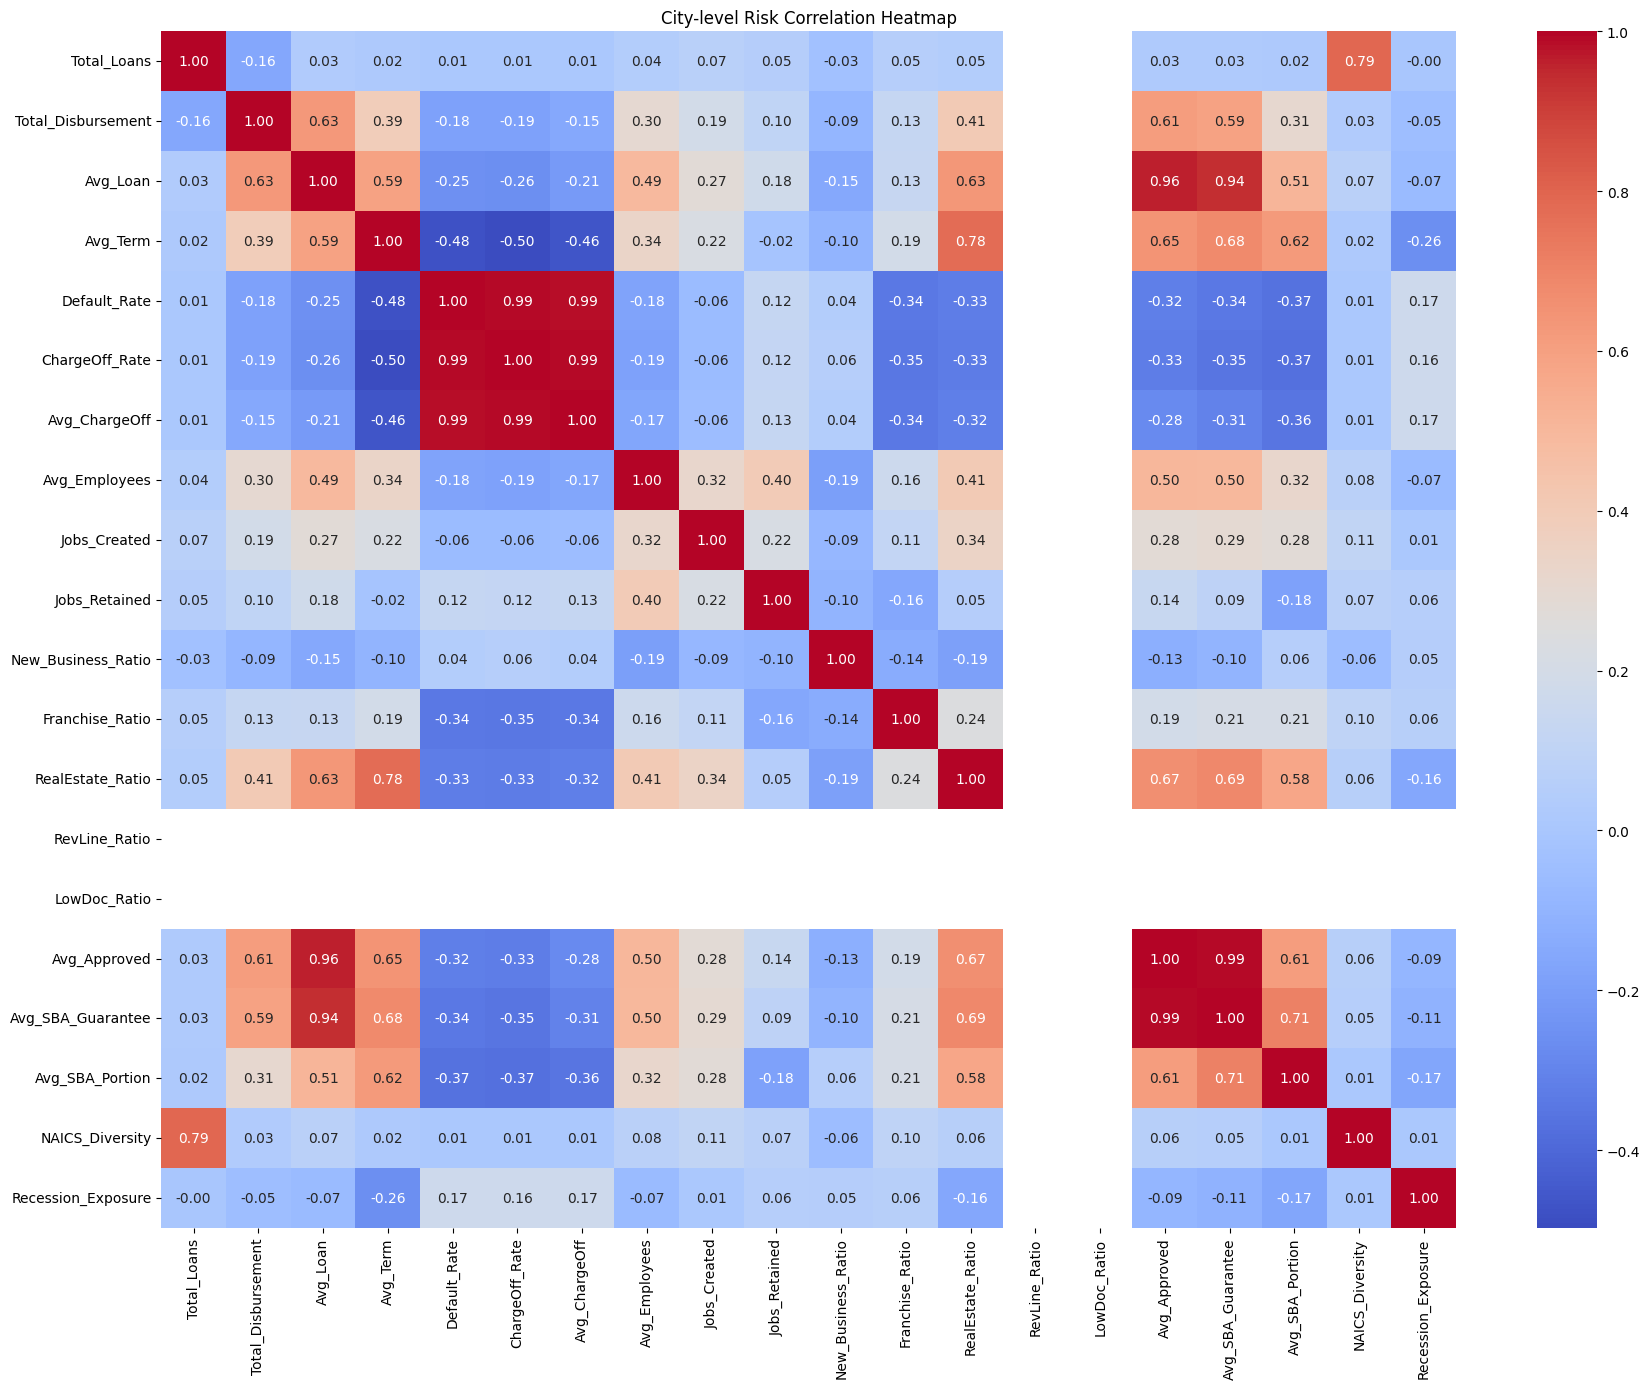

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def dataDiscribtion(df):
    data = df.copy()

    print("Dataset Shape :", data.shape)
    print("Total Loans   :", len(data))
    print("Unique Cities :", data['City'].nunique())
    print("Unique Sectors (NAICS) :", data['NAICS'].nunique())

    city_risk = (
        data.groupby('City')
        .agg(
            Total_Loans=('LoanNr_ChkDgt', 'count'),
            Total_Disbursement=('DisbursementGross', 'sum'),
            Avg_Loan=('DisbursementGross', 'mean'),
            Avg_Term=('Term', 'mean'),

            Default_Rate=('Default', 'mean'),
            ChargeOff_Rate=('ChgOffPrinGr', lambda x: (x > 0).mean()),
            Avg_ChargeOff=('ChgOffPrinGr', 'mean'),

            Avg_Employees=('NoEmp', 'mean'),
            Jobs_Created=('CreateJob', 'mean'),
            Jobs_Retained=('RetainedJob', 'mean'),

            New_Business_Ratio=('NewExist', 'mean'),
            Franchise_Ratio=('FranchiseCode', lambda x: (x != 0).mean()),
            RealEstate_Ratio=('RealEstate', 'mean'),

            RevLine_Ratio=('RevLineCr', lambda x: (x == 'Y').mean()),
            LowDoc_Ratio=('LowDoc', lambda x: (x == 'Y').mean()),

            Avg_Approved=('GrAppv', 'mean'),
            Avg_SBA_Guarantee=('SBA_Appv', 'mean'),
            Avg_SBA_Portion=('Portion', 'mean'),

            NAICS_Diversity=('NAICS', 'nunique'),
            Recession_Exposure=('Recession', 'mean')
        )
        .sort_values('Total_Loans', ascending=False)
    )

    print("\nTop Cities Risk Snapshot")
    display(city_risk.head(10))

    top = city_risk.head(15)


    plt.figure(figsize=(10,4))
    plt.bar(top.index, top['Total_Loans'])
    plt.xticks(rotation=75)
    plt.title("Loan Concentration by City")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10,4))
    plt.bar(top.index, top['Default_Rate'])
    plt.xticks(rotation=75)
    plt.title("City-wise Default Risk")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6,4))
    plt.scatter(top['Total_Loans'], top['Default_Rate'])
    plt.axhline(top['Default_Rate'].mean(), linestyle='--')
    plt.axvline(top['Total_Loans'].mean(), linestyle='--')
    plt.xlabel("Total Loans")
    plt.ylabel("Default Rate")
    plt.title("Loan Volume vs Risk")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10,4))
    plt.bar(top.index, top['Avg_Loan'])
    plt.xticks(rotation=75)
    plt.title("Average Loan Size by City")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6,5))
    plt.barh(top.index, top['Avg_Employees'])
    plt.title("Employment Strength by City")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10,4))
    plt.bar(top.index, top['Jobs_Retained'], label='Retained')
    plt.bar(top.index, top['Jobs_Created'], bottom=top['Jobs_Retained'], label='Created')
    plt.legend()
    plt.xticks(rotation=75)
    plt.title("Employment Stability vs Growth")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10,4))
    plt.plot(top.index, top['RealEstate_Ratio'], marker='o')
    plt.xticks(rotation=75)
    plt.title("Real Estate Dependency by City")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10,4))
    plt.bar(top.index, top['LowDoc_Ratio'])
    plt.xticks(rotation=75)
    plt.title("Low Documentation Risk by City")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10,4))
    plt.bar(top.index, top['NAICS_Diversity'])
    plt.xticks(rotation=75)
    plt.title("Sector Diversity by City")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6,4))
    plt.scatter(top['Recession_Exposure'], top['Default_Rate'])
    plt.xlabel("Recession Exposure")
    plt.ylabel("Default Rate")
    plt.title("Macro Sensitivity vs Risk")
    plt.tight_layout()
    plt.show()

    corr_matrix = city_risk.corr()

    plt.figure(figsize=(18,14))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("City-level Risk Correlation Heatmap")
    plt.tight_layout()
    plt.show()
dataDiscribtion(cleanDF)


In [8]:
cleanDF.describe()

,Selected,LoanNr_ChkDgt,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,...,DisbursementGross,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,xx,Default
count,2090.000000,2.090000e+03,2090.000000,2.090000e+03,2.090000e+03,2.090000e+03,2090.000000,2.090000e+03,2.090000e+03,2090.000000,...,2.090000e+03,2090.000000,2.090000e+03,2.090000e+03,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000
mean,0.500957,4.463471e+09,531629.955024,-2.407006e-14,-2.175825e-16,3.263737e-16,0.154067,-7.479397e-17,1.393888e-16,1973.019139,...,-6.255496e-16,0.000000,-7.615386e-16,-2.447803e-16,0.154067,0.275598,0.670636,0.068900,20084.612919,0.327751
std,0.500119,2.530834e+09,522.025855,1.000239e+00,1.000239e+00,1.000239e+00,0.361099,1.000239e+00,1.000239e+00,11271.067817,...,1.000239e+00,1.000239,1.000239e+00,1.000239e+00,0.361099,0.446922,0.186490,0.253344,2849.762378,0.469506
min,0.000000,1.004285e+09,531110.000000,-3.804393e+00,-5.451825e+00,-1.789109e+00,0.000000,-6.880651e-01,-1.194245e+00,0.000000,...,-2.246555e+00,-0.699888,-2.035653e+00,-1.959797e+00,0.000000,0.000000,0.296770,0.000000,11524.000000,0.000000
25%,0.000000,2.379915e+09,531210.000000,-2.661540e-01,-5.336843e-01,-6.280844e-01,0.000000,-6.880651e-01,-5.122840e-01,0.000000,...,-6.969436e-01,-0.699888,-7.339408e-01,-8.062214e-01,0.000000,0.000000,0.500000,0.000000,18324.500000,0.000000
50%,1.000000,3.600864e+09,531312.000000,2.393088e-01,-1.367547e-01,-3.240590e-01,0.000000,-6.880651e-01,-1.133621e-01,1.000000,...,-2.848490e-02,-0.699888,-2.303105e-01,-1.846978e-01,0.000000,0.000000,0.500000,0.000000,19270.000000,0.000000
75%,1.000000,6.545109e+09,532230.000000,7.447716e-01,1.110041e+00,5.329404e-01,0.000000,5.228104e-01,5.685994e-01,1.000000,...,7.759755e-01,1.279122,8.461181e-01,8.793769e-01,0.000000,1.000000,0.850000,0.000000,22375.000000,1.000000
max,1.000000,9.925643e+09,533110.000000,1.755697e+00,1.399624e+00,5.057446e+00,1.000000,4.685311e+00,4.988478e+00,89658.000000,...,2.272252e+00,2.202361,2.258623e+00,2.203515e+00,1.000000,1.000000,1.000000,1.000000,27598.000000,1.000000


In [9]:
def minmax_01(x):
    if x.nunique(dropna=True) <= 1:
        return pd.Series(0.5, index=x.index)
    return (x - x.min()) / (x.max() - x.min() + 1e-9)

def compute_city_geo_risk(df):

    city = (
        df.groupby('City')
        .agg(
            Recession_Exposure=('Recession', 'mean'),
            NAICS_Diversity=('NAICS', 'nunique'),
            Avg_Employees=('NoEmp', 'mean'),
            RealEstate_Ratio=('RealEstate', 'mean'),
            Urban_Pressure=('UrbanRural', 'mean')
        )
    )

    city_norm = city.apply(minmax_01)

    city['Geo_Risk_Score'] = (
        0.30 * city_norm['Recession_Exposure'] +
        0.25 * (1 - city_norm['NAICS_Diversity']) +
        0.20 * (1 - city_norm['Avg_Employees']) +
        0.15 * city_norm['RealEstate_Ratio'] +
        0.10 * city_norm['Urban_Pressure']
    )

    city['Geo_Risk_Score'] = minmax_01(city['Geo_Risk_Score'])

    return city[['Geo_Risk_Score']]
def compute_exposure_risk(df):

    exposure = pd.DataFrame({
        'Loan_Size': df['DisbursementGross'].fillna(df['DisbursementGross'].median()),
        'Term_Risk': df['Term'].fillna(df['Term'].median()),
        'Low_Guarantee': (1 - df['Portion']).fillna(1),
        'LowDoc': df['LowDoc'].fillna(0),
        'RevLine': df['RevLineCr'].fillna(0),
        'RealEstate': df['RealEstate'].fillna(0)
    })

    exposure_norm = exposure.apply(minmax_01)

    risk = (
        0.30 * exposure_norm['Loan_Size'] +
        0.20 * exposure_norm['Term_Risk'] +
        0.20 * exposure_norm['Low_Guarantee'] +
        0.10 * exposure_norm['LowDoc'] +
        0.10 * exposure_norm['RevLine'] +
        0.10 * exposure_norm['RealEstate']
    )

    return minmax_01(risk)

def compute_stability_risk(df):

    stab = pd.DataFrame({
        'Emp_Buffer': df['NoEmp'],
        'Job_Stability': df['RetainedJob'] - df['CreateJob'],
        'Business_Age': 1 - df['NewExist'],
        'Franchise': (df['FranchiseCode'] != 0).astype(int),
        'ChargeOff_Signal': df['ChgOffPrinGr']
    })

    stab_norm = stab.apply(minmax_01)

    risk = (
        0.35 * (1 - stab_norm['Emp_Buffer']) +
        0.20 * (1 - stab_norm['Job_Stability']) +
        0.20 * (1 - stab_norm['Business_Age']) +
        0.15 * (1 - stab_norm['Franchise']) +
        0.10 * stab_norm['ChargeOff_Signal']
    )

    return minmax_01(risk)
def build_three_scores(df):

    df = df.copy()

    geo = compute_city_geo_risk(df)
    df = df.merge(geo, on='City', how='left')

    df['Exposure_Risk_Score'] = compute_exposure_risk(df)
    df['Stability_Risk_Score'] = compute_stability_risk(df)

    return df[['Geo_Risk_Score',
               'Exposure_Risk_Score',
               'Stability_Risk_Score']]

scores = build_three_scores(cleanDF)
scores['Baseline_Risk'] = (
    0.4 * scores['Stability_Risk_Score'] +
    0.35 * scores['Exposure_Risk_Score'] +
    0.25 * scores['Geo_Risk_Score']
)
scores['Default'] = cleanDF['Default']

scores.to_csv('d.csv')

/tmp/ipykernel_17/2493729033.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


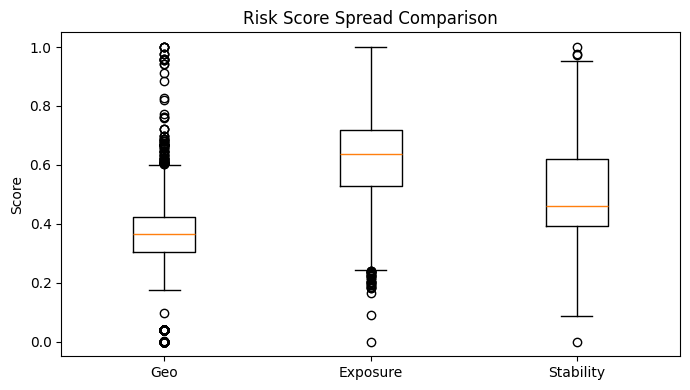

In [10]:
plt.figure(figsize=(7,4))
plt.boxplot(
    [scores['Geo_Risk_Score'],
     scores['Exposure_Risk_Score'],
     scores['Stability_Risk_Score']],
    labels=['Geo', 'Exposure', 'Stability']
)
plt.title('Risk Score Spread Comparison')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


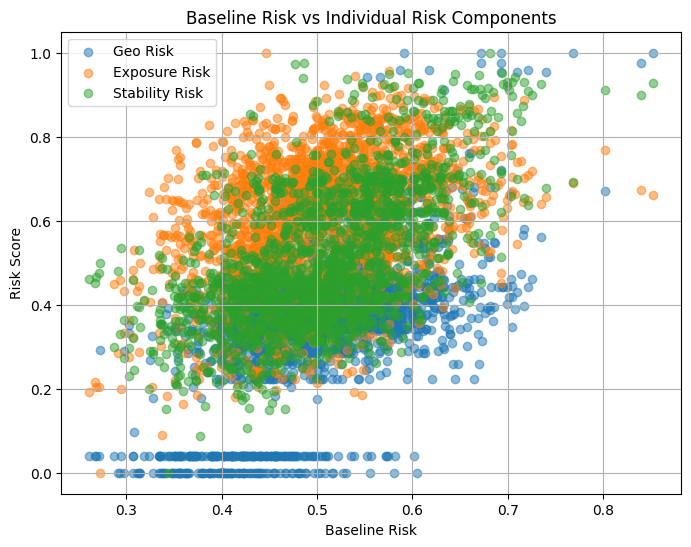

In [11]:
plt.figure(figsize=(8,6))

plt.scatter(scores['Baseline_Risk'], scores['Geo_Risk_Score'],
            alpha=0.5, label='Geo Risk')

plt.scatter(scores['Baseline_Risk'], scores['Exposure_Risk_Score'],
            alpha=0.5, label='Exposure Risk')

plt.scatter(scores['Baseline_Risk'], scores['Stability_Risk_Score'],
            alpha=0.5, label='Stability Risk')

plt.xlabel('Baseline Risk')
plt.ylabel('Risk Score')
plt.title('Baseline Risk vs Individual Risk Components')
plt.legend()
plt.grid(True)

plt.show()


In [12]:
scores['Default'].isnull().sum()
scores=scores.dropna()

In [13]:
# The fix:
scores['Default'].value_counts()


Default
0.0    1397
1.0     682
Name: count, dtype: int64


optimal threshold from validation set: 0.40 (f1=0.585)

training metrics
auc: 0.878
accuracy: 0.724
precision: 0.550
recall: 0.880
f1: 0.677

validation metrics
auc: 0.729
accuracy: 0.649
precision: 0.479
recall: 0.752
f1: 0.585

test metrics
auc: 0.773
accuracy: 0.666
precision: 0.493
recall: 0.809
f1: 0.613


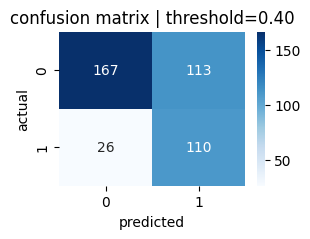

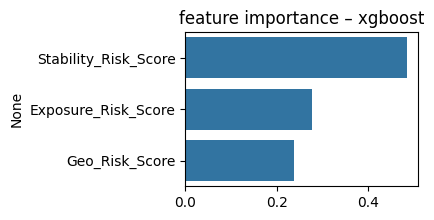

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)

from xgboost import XGBClassifier

# input features and target
X = scores[['Geo_Risk_Score', 'Exposure_Risk_Score', 'Stability_Risk_Score']]
y = scores['Default']

# 60% train, 20% validation, 20% test split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# balance training data only
df_train = pd.concat([X_train, y_train], axis=1)
df_0 = df_train[df_train['Default'] == 0]
df_1 = df_train[df_train['Default'] == 1]

min_count = min(len(df_0), len(df_1))

df_balanced = pd.concat([
    df_0.sample(min_count, random_state=42),
    df_1.sample(min_count, random_state=42)
])

X_train_bal = df_balanced[X.columns]
y_train_bal = df_balanced['Default']

# xgboost model (explainable and strong)
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train_bal, y_train_bal)

# evaluate probabilities
p_train = xgb_model.predict_proba(X_train)[:, 1]
p_val = xgb_model.predict_proba(X_val)[:, 1]
p_test = xgb_model.predict_proba(X_test)[:, 1]

# threshold tuning using validation set
thresholds = np.arange(0.3, 0.71, 0.05)
best_threshold = 0.5
best_f1 = 0

for t in thresholds:
    y_hat_val = (p_val >= t).astype(int)
    f1 = f1_score(y_val, y_hat_val)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"\noptimal threshold from validation set: {best_threshold:.2f} (f1={best_f1:.3f})")

# predictions using optimal threshold
y_hat_train = (p_train >= best_threshold).astype(int)
y_hat_val = (p_val >= best_threshold).astype(int)
y_hat_test = (p_test >= best_threshold).astype(int)

# metrics function
def print_metrics(name, y_true, y_prob, y_pred):
    print(f"\n{name} metrics")
    print(f"auc: {roc_auc_score(y_true, y_prob):.3f}")
    print(f"accuracy: {accuracy_score(y_true, y_pred):.3f}")
    print(f"precision: {precision_score(y_true, y_pred):.3f}")
    print(f"recall: {recall_score(y_true, y_pred):.3f}")
    print(f"f1: {f1_score(y_true, y_pred):.3f}")

# training, validation, and test performance
print_metrics("training", y_train, p_train, y_hat_train)
print_metrics("validation", y_val, p_val, y_hat_val)
print_metrics("test", y_test, p_test, y_hat_test)

# confusion matrix (test)
cm = confusion_matrix(y_test, y_hat_test)
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"confusion matrix | threshold={best_threshold:.2f}")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

# feature importance
imp = pd.Series(
    xgb_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(3, 2))
sns.barplot(x=imp.values, y=imp.index)
plt.title("feature importance – xgboost")
plt.show()

# final default probability for full dataset
scores['Default_Prob'] = xgb_model.predict_proba(X)[:, 1]
